## STEP-1: Importing Libraries & Data Set

In [82]:
#import required python libraries

import numpy as np                                               
import pandas as pd                                             

import matplotlib.pyplot as plt                                  
import seaborn as sns                                          

import warnings                                                  
warnings.simplefilter(action='ignore')                          

from sklearn.cluster import AgglomerativeClustering              
from sklearn.cluster import KMeans                            
from sklearn.cluster import DBSCAN                            
from sklearn.neighbors import NearestNeighbors                
from sklearn.metrics import silhouette_score                    
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler               
from sklearn.preprocessing import LabelEncoder                   


In [36]:
#Read the Data 

df = pd.read_csv("Proj3_MallCustomers_Data_Project.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# STEP-2:Exploratory Data Analysis (EDA)

### To check the structure of data

In [37]:
# Preview of the data
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [38]:
print('Dimensions: {} Rows and {} Columns '.format(df.shape[0], df.shape[1]))

Dimensions: 200 Rows and 5 Columns 


In [39]:
# to check the column names
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

### Obsevation: 

##### Here we can observe, given dataset is consist of 200 rows and 5 columns.

### Sumarizing Data

In [40]:
# Descriptive stats

df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [41]:
# Description and summary of categorical data
df.describe(include = 'object').T

,count,unique,top,freq
Gender,200,2,Female,112


In [42]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### Identify missing values

In [43]:
# checking for missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Obsevation: 

##### Here we can observe, given dataset contains no missing values.

### Correlation Plot

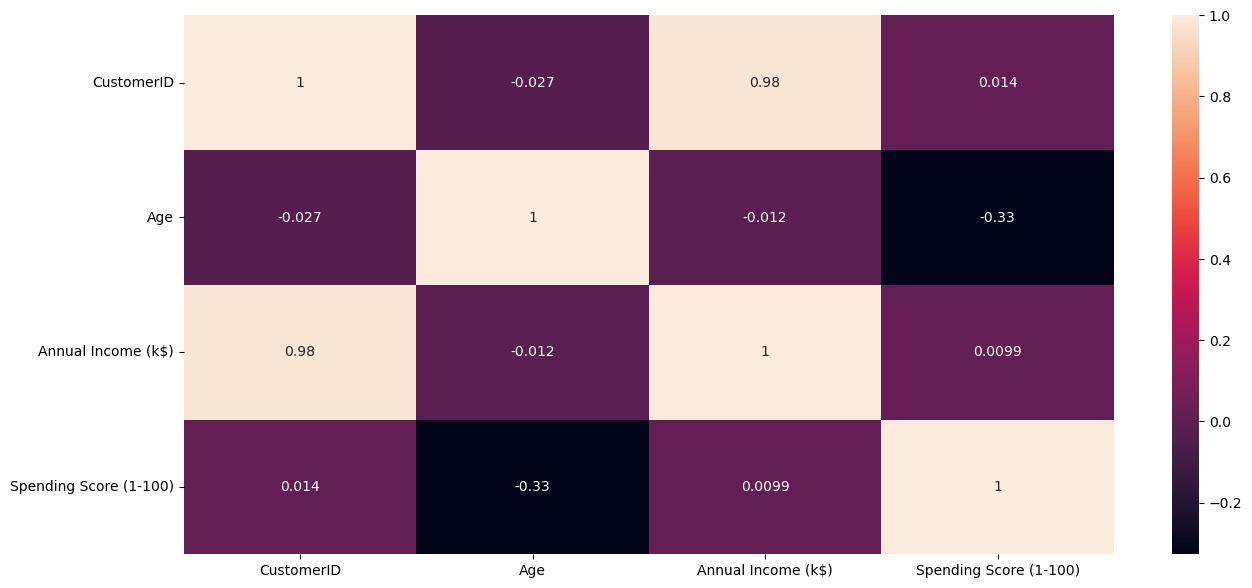

In [23]:
#checking correlations among variables

plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

# STEP-3:Data Preprocessing / Clean the Data

## Remove unnecessary columns

In [44]:
# removing unnecessary columns from the dataset

df = df.drop("CustomerID", axis=1)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


### Label Encoding

#### Applying Label Encoder on Gender Attribute

In [83]:
# Label Encoding
encoder = preprocessing.LabelEncoder()
encoder.fit(df['Gender'])
print(encoder.classes_)
df['Gender'] = encoder.transform(df['Gender'])
df.head()

['Female' 'Male']


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [84]:
# final dataset for model building
data = df[["Annual Income (k$)", "Spending Score (1-100)"]]
data.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


## Scaling of data

In [46]:
#scaling of data
std_scaler = StandardScaler()

scale_columns = ["Annual Income (k$)", "Spending Score (1-100)"]
data[scale_columns] = std_scaler.fit_transform(data[scale_columns])

data.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


# STEP-4 : Model Building

## Model 1 : K-Means Clustering Model

In [85]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

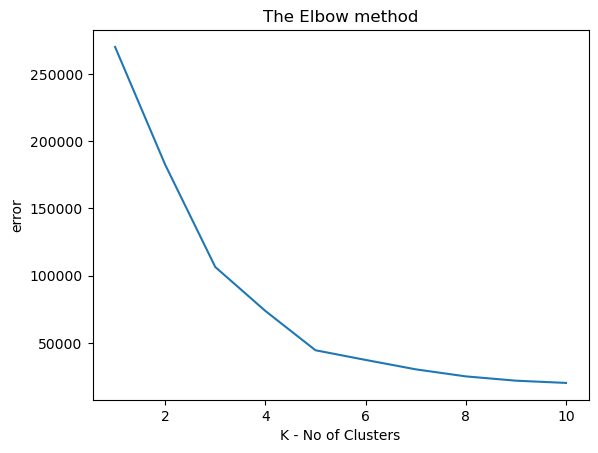

In [86]:
error = []
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init= 'k-means++', max_iter=300, n_init = 10)
    kmeans.fit(data)
    error.append(kmeans.inertia_)
plt.plot(range(1,11), error)
plt.title('The Elbow method')
plt.xlabel('K - No of Clusters')
plt.ylabel('error')
plt.show()

In [87]:
from sklearn.cluster import KMeans

# Model building
Model_km = KMeans(n_clusters=5,random_state=42)
Model_km.fit(data[['Annual Income (k$)','Spending Score (1-100)']])

KMeans(n_clusters=5, random_state=42)

In [88]:
# Adding cluster to original data
data['Kmeans_clusters'] = Model_km.labels_

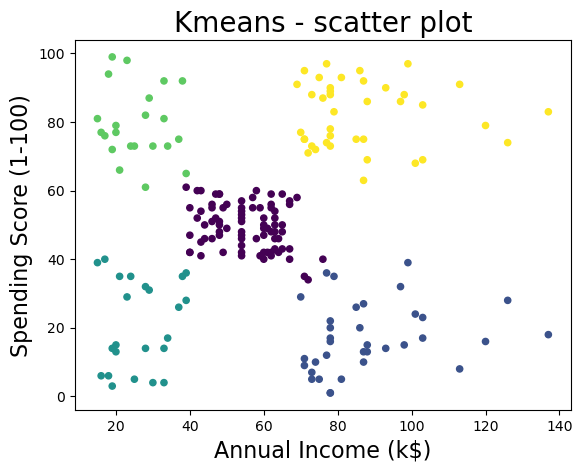

In [89]:
# Plotting resulting cluster
plt.scatter(data['Annual Income (k$)'],data['Spending Score (1-100)'], c = data['Kmeans_clusters'], s=20) #c= for color

plt.title('Kmeans - scatter plot',fontsize=20)
plt.xlabel('Annual Income (k$)',fontsize=16)
plt.ylabel('Spending Score (1-100)',fontsize=16)

plt.show()

In [90]:
#silhouette_score
metrics.silhouette_score(data, data['Kmeans_clusters'])

0.5552538794032924

## Model 2 : Agglomerative Hierarchical Clustering Model

In [65]:
from sklearn.cluster import AgglomerativeClustering

# Model building
Model_h = AgglomerativeClustering(n_clusters=4,affinity = 'euclidean', linkage='ward')
Model_h.fit(data[['Annual Income (k$)','Spending Score (1-100)']])

AgglomerativeClustering(n_clusters=4)

In [66]:
# Adding cluster to original data
data['hc_clusters'] = Model_h.labels_

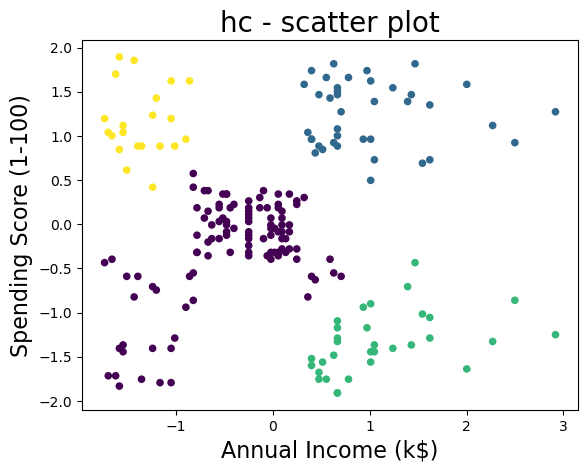

In [67]:
# Plotting resulting cluster
plt.scatter(data['Annual Income (k$)'],data['Spending Score (1-100)'], c = data['hc_clusters'], s=20) #c= for color

plt.title('hc - scatter plot',fontsize=20)
plt.xlabel('Annual Income (k$)',fontsize=16)
plt.ylabel('Spending Score (1-100)',fontsize=16)

plt.show()

In [68]:
metrics.silhouette_score(data, data['hc_clusters'])

0.599238886279049

## Model 3 : DBSCAN Clustering Model

### DBSCAN without hyperparameters

In [ ]:
from sklearn.cluster import DBSCAN

# Model building
dbscan=DBSCAN()
dbscan.fit(data[['Annual Income (k$)','Spending Score (1-100)']])

In [70]:
# Adding cluster to original data
data['DBSCAN_clusters']=dbscan.labels_

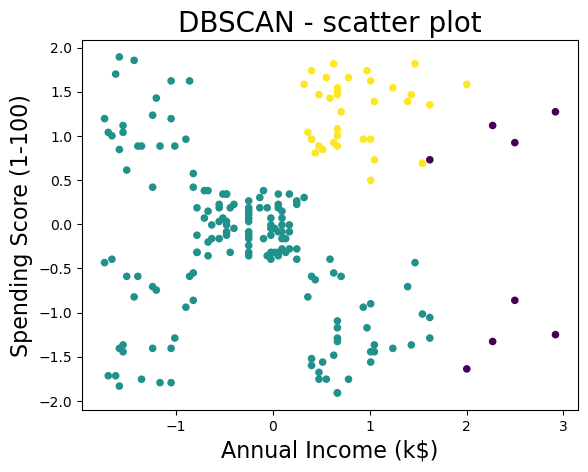

In [71]:
# Plotting resulting cluster
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c = data['DBSCAN_clusters'], s=20) #c= for color

plt.title('DBSCAN - scatter plot',fontsize=20)
plt.xlabel('Annual Income (k$)',fontsize=16)
plt.ylabel('Spending Score (1-100)',fontsize=16)

plt.show()

### Plot K- distance graph to evaluate the optimum eps value

In [ ]:
from sklearn.neighbors import NearestNeighbors

#model building
neigh = NearestNeighbors(n_neighbors=4)
nbrs = neigh.fit(data[['Annual Income (k$)','Spending Score (1-100)']])

#Tuple unpacking
distances, indices = nbrs.kneighbors(data[['Annual Income (k$)','Spending Score (1-100)']])

In [73]:
distances1 = np.sort(distances, axis = 0)
distances1 = distances1[:, 1] #fetch distance

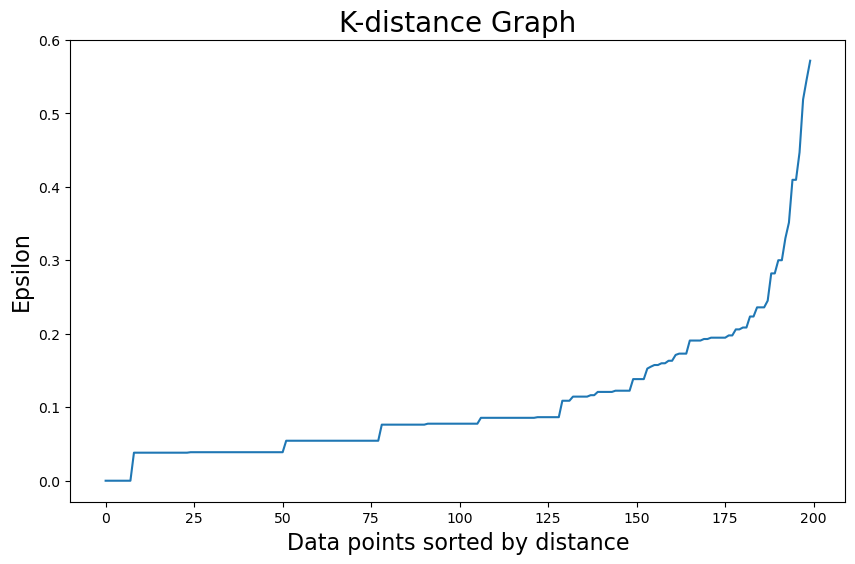

In [74]:
#Plotting K=distance graph
plt.figure(figsize = (10,6))
plt.plot(distances1)

plt.title('K-distance Graph', fontsize = 20)
plt.xlabel('Data points sorted by distance',fontsize=16)
plt.ylabel('Epsilon',fontsize=16)
plt.show()

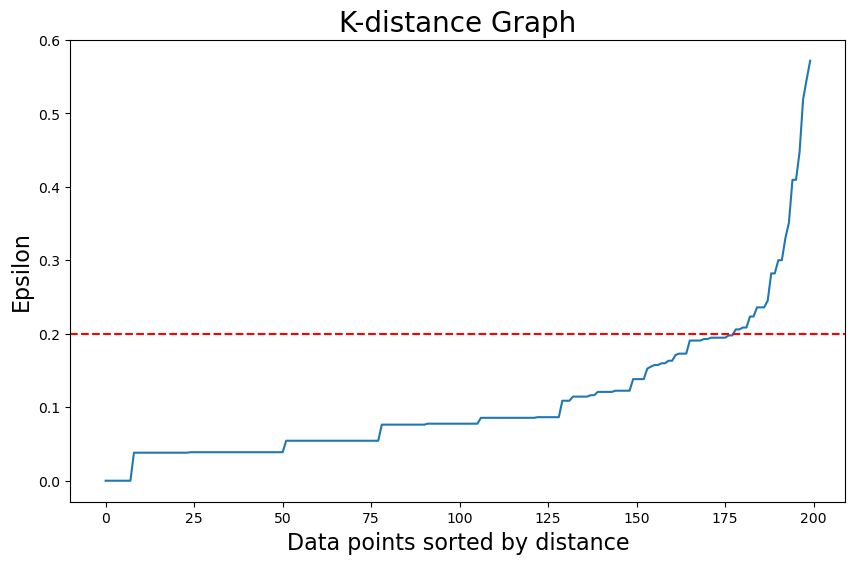

In [75]:
#plotting k-distance graph with marked epsilon value
plt.figure(figsize = (10,6))
plt.plot(distances1)
plt.axhline(y = 0.2, color = 'r', linestyle = '--')

plt.title('K-distance Graph', fontsize = 20)
plt.xlabel('Data points sorted by distance',fontsize=16)
plt.ylabel('Epsilon',fontsize=16)
plt.show()

## DBSCAN algorithm with Hyperparameters

In [76]:
eps=0.2

for min_samples in [3,4,5,6,7,8,9,10,11,12,13,14,15]: 
 clusterer = DBSCAN(eps=eps, min_samples=min_samples)
 cluster_labels = clusterer.fit_predict(data)
 x= cluster_labels +2
 y = np.bincount(x)

 ii = np.nonzero(y)[0]
 results = list(zip(ii,y[ii]) )
 print('eps=',eps,'| min_samples= ', min_samples, '| obtained clustering: ', results)

eps= 0.2 | min_samples=  3 | obtained clustering:  [(1, 44), (2, 3), (3, 11), (4, 3), (5, 3), (6, 4), (7, 3), (8, 3), (9, 3), (10, 79), (11, 21), (12, 14), (13, 3), (14, 6)]
eps= 0.2 | min_samples=  4 | obtained clustering:  [(1, 73), (2, 7), (3, 79), (4, 21), (5, 14), (6, 6)]
eps= 0.2 | min_samples=  5 | obtained clustering:  [(1, 77), (2, 6), (3, 78), (4, 11), (5, 9), (6, 10), (7, 4), (8, 5)]
eps= 0.2 | min_samples=  6 | obtained clustering:  [(1, 95), (2, 78), (3, 10), (4, 9), (5, 8)]
eps= 0.2 | min_samples=  7 | obtained clustering:  [(1, 100), (2, 78), (3, 8), (4, 7), (5, 7)]
eps= 0.2 | min_samples=  8 | obtained clustering:  [(1, 116), (2, 76), (3, 8)]
eps= 0.2 | min_samples=  9 | obtained clustering:  [(1, 128), (2, 72)]
eps= 0.2 | min_samples=  10 | obtained clustering:  [(1, 129), (2, 71)]
eps= 0.2 | min_samples=  11 | obtained clustering:  [(1, 129), (2, 71)]
eps= 0.2 | min_samples=  12 | obtained clustering:  [(1, 134), (2, 30), (3, 36)]
eps= 0.2 | min_samples=  13 | obtaine

### Hyperparameters:
##### Epsilon = 0.2
##### Min samples = 9

In [77]:
from sklearn.cluster import DBSCAN

#model building
dbscan1=DBSCAN(eps = 0.2, min_samples = 9)
dbscan1.fit(data[['Annual Income (k$)','Spending Score (1-100)']])

DBSCAN(eps=0.2, min_samples=9)

In [78]:
# Adding cluster to original data
data['DBSCAN_cluster']=dbscan1.labels_

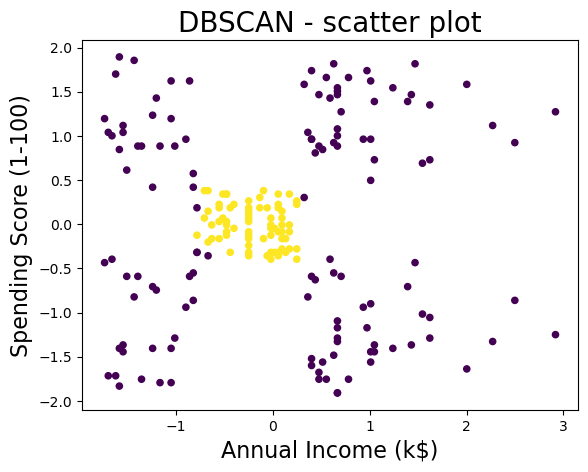

In [79]:
# Plotting resulting cluster
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c = data['DBSCAN_cluster'], s=20) #c= for color

plt.title('DBSCAN - scatter plot',fontsize=20)
plt.xlabel('Annual Income (k$)',fontsize=16)
plt.ylabel('Spending Score (1-100)',fontsize=16)

plt.show()

In [80]:
metrics.silhouette_score(data, data['DBSCAN_cluster'])

0.32870621317953364